In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction

StreamFlow, a subscription-based content streaming platform, has been facing a significant issue with subscriber churn, with the largest volume of churners in its 'Standard' tier. Despite offering a diverse range of content and competitive pricing, there has been an observable trend where many users either downgrade to the 'Basic' tier after a few months or leave the service entirely. The company wants to understand the factors contributing to churn, and identify opportunities to drive improved retention. Further, they want to build a business case to implement retention improvement initiatives by estimating the impact to key business metrics. 

In [37]:
#Read raw file
df=pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [38]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [39]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


<Axes: xlabel='Monthly_Hours_Watched', ylabel='Count'>

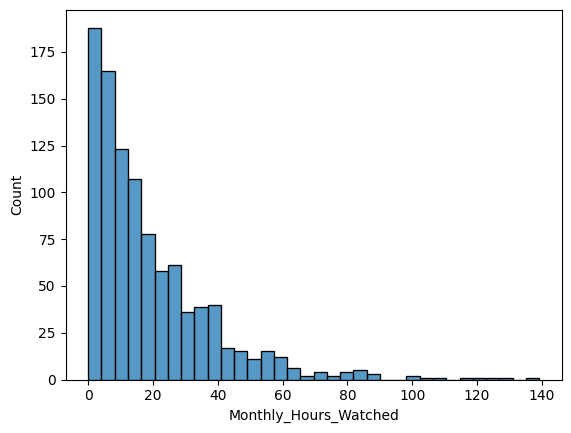

In [40]:
sns.histplot(df['Monthly_Hours_Watched'])

<Axes: xlabel='Average_Session_Length', ylabel='Count'>

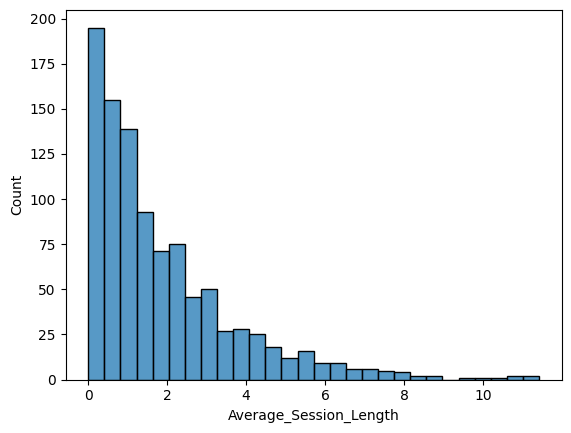

In [41]:
sns.histplot(df['Average_Session_Length'])

In [42]:
df[['Average_Session_Length','Monthly_Hours_Watched']].sort_values('Average_Session_Length', ascending=False)

,Average_Session_Length,Monthly_Hours_Watched
60,11.417557,15.770722
980,11.049324,21.455937
543,10.946469,24.448848
824,10.854212,14.383063
856,10.330367,17.062992
...,...,...
274,0.004700,40.583644
92,0.001580,41.212535
155,0.001434,10.835703
866,0.000821,1.140832


In [45]:

df[['Average_Session_Length','Monthly_Hours_Watched']].sort_values('Monthly_Hours_Watched', ascending=False)

,Average_Session_Length,Monthly_Hours_Watched
697,1.332512,139.170408
806,1.665151,127.764432
730,0.339991,126.398346
358,4.781468,119.974869
419,1.605160,114.949551
...,...,...
84,4.667133,0.076891
934,3.947468,0.074186
593,1.785276,0.054236
863,7.167577,0.046522


In [46]:
df[['Devices_Used','Rating_Given']].sort_values('Rating_Given', ascending=True)

,Devices_Used,Rating_Given
455,Tablet,1
695,Mobile,1
158,Mobile,1
159,Tablet,1
356,PC,1
...,...,...
843,Tablet,5
844,Tablet,5
287,PC,5
722,Tablet,5


In [49]:

df[['Favorite_Genre','Rating_Given']].sort_values('Rating_Given', ascending=True)

,Favorite_Genre,Rating_Given
455,Drama,1
695,Sci-Fi,1
158,Action,1
159,Action,1
356,Drama,1
...,...,...
843,Drama,5
844,Documentary,5
287,Drama,5
722,Sci-Fi,5


In [ ]:
df[['Favorite_Genre','Rating_Given']].sort_values('Rating_Given', ascending=True)